Q1:How many elements does the array have (this is the number of signal events in the data file)?

In [13]:
timestamps = []

with open('TopRight_20230803.txt', 'r') as file:
    for line in file:
        columns = line.split()
        if len(columns) >= 4 and columns[3].replace('.', '', 1).isdigit():
            timestamps.append(float(columns[3]))

num_elements = len(timestamps)

print("About:", num_elements)

About: 763301


Q2:Fill the TimeStamp values into a 1 dimensional histogram with 100 bins. What is the shape of the distribution you see?

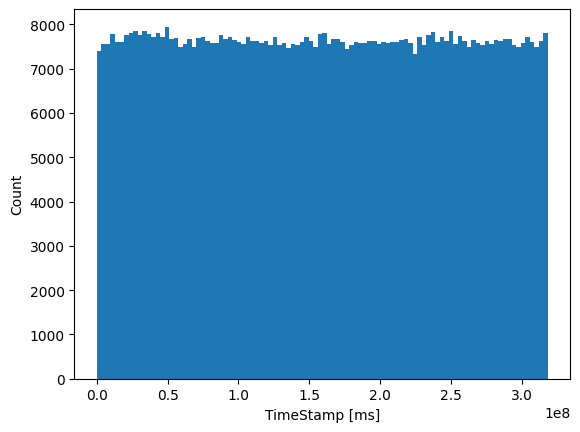

In [11]:
import matplotlib.pyplot as plt

plt.hist(timestamps, bins=100)
plt.xlabel('TimeStamp [ms]')
plt.ylabel('Count')
plt.show()

Q3:The TimeStamp value, measured in milli-seconds, indicates when after time t = 0s each signal event occurred. The value of the last TimeStamp gives the total Ame duration over which data were collected. Approximately, what is the rate of signal events per second?

In [16]:
last_timestamp = timestamps[-1]
total_duration_ms = last_timestamp

num_events = len(timestamps)
events_per_second = num_events / (total_duration_ms / 1000)

print("Rate:", events_per_second)


Rate: 2.3959550205030924


Q4:What is the relative statistical uncertainty on the average rate of signal events per second, based on the TimeStamp information?

Hint: In this question we use the coefficient of variation as the relative statistical uncertainty. You can compute 100 rates using the stats in these 100 bins. Dividing the standard deviation of these 100 rates by the absolute value of their mean will give you the coefficient of variation.

In [21]:
import numpy as np

num_bins = 100
bin_size = total_duration_ms / num_bins

event_counts, _ = np.histogram(timestamps, bins=num_bins) 
rates = event_counts / (bin_size / 1000)

mean_rate = np.mean(rates)
std_dev = np.std(rates)
relative_uncertainty = (std_dev / abs(mean_rate)) * 100 

print("Relative statistical uncertainty: {:.2f}%".format(relative_uncertainty))

Relative statistical uncertainty: 1.39%
